In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_auc_score

In [ ]:
#dataset = pd.read_csv('/content/drive/MyDrive/Wetland/T500.csv')
dataset = pd.read_csv('/content/drive/MyDrive/Wetland/Wetland Final Dataset/W3.csv')

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 926 entries, 0 to 925
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sl      926 non-null    int64  
 1   VZ      926 non-null    int64  
 2   GW      926 non-null    int64  
 3   M       926 non-null    float64
 4   R       926 non-null    float64
 5   C       926 non-null    float64
 6   B       926 non-null    float64
 7   E       926 non-null    int64  
 8   BA      926 non-null    float64
 9   A       926 non-null    float64
 10  TWI     926 non-null    float64
 11  TPI     926 non-null    float64
 12  CR      926 non-null    float64
 13  AS      926 non-null    float64
 14  SO      926 non-null    int64  
 15  L       926 non-null    int64  
dtypes: float64(10), int64(6)
memory usage: 115.9 KB


In [ ]:
dataset.head(253)

,Sl,VZ,GW,M,R,C,B,E,BA,A,TWI,TPI,CR,AS,SO,L
0,63,1,6,0.029163,0.000000,0.000888,0.014613,7,60.000000,0.000000,7.252788,0.222222,0.111111,281.309936,2,3
1,72,1,6,0.024442,0.000000,0.001600,0.014356,10,108.166542,0.000000,7.811803,-0.666667,-0.333333,300.963745,2,4
2,80,1,6,0.023546,0.000868,0.000888,0.015250,7,30.000000,30.000000,10.674983,-0.666667,-0.222222,341.565064,2,4
3,96,1,2,0.025498,0.000614,0.004187,0.014212,6,94.868332,67.082039,7.436651,0.555555,0.222222,315.000000,2,5
4,106,1,6,0.022431,0.001840,0.003106,0.017491,5,120.000000,174.928558,12.749857,0.000000,0.000000,315.000000,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,1472,2,2,0.032422,0.014549,0.004633,0.047540,1,84.852814,189.736664,14.200773,0.000000,0.000000,-1.000000,2,6
249,1490,2,2,0.016279,0.005555,0.000444,0.023839,2,169.705627,108.166542,11.407565,0.000000,0.000000,-1.000000,2,4
250,1498,2,2,0.012804,0.006135,0.005648,0.018993,2,201.246124,182.482880,13.199325,0.000000,0.000000,-1.000000,2,4
251,1506,2,2,0.015757,0.007008,0.013321,0.017709,2,150.000000,123.693169,16.048746,0.000000,0.000000,-1.000000,2,4


In [ ]:
X = dataset.iloc[:,2:]
y = dataset.VZ

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 926 entries, 0 to 925
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   GW      926 non-null    int64  
 1   M       926 non-null    float64
 2   R       926 non-null    float64
 3   C       926 non-null    float64
 4   B       926 non-null    float64
 5   E       926 non-null    int64  
 6   BA      926 non-null    float64
 7   A       926 non-null    float64
 8   TWI     926 non-null    float64
 9   TPI     926 non-null    float64
 10  CR      926 non-null    float64
 11  AS      926 non-null    float64
 12  SO      926 non-null    int64  
 13  L       926 non-null    int64  
dtypes: float64(10), int64(4)
memory usage: 101.4 KB


In [ ]:
dataset['VZ'].value_counts()

1    198
2    189
3    184
5    182
4    173
Name: VZ, dtype: int64

In [ ]:
y = label_binarize(y, classes=[1, 2, 3, 4, 5])
n_classes = y.shape[1]

In [ ]:
y

array([[1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1]])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

**SVM**

In [ ]:
classifier_SVM = OneVsRestClassifier(svm.SVC(kernel="linear", probability=True, random_state=0))
y_score_SVM = classifier_SVM.fit(X_train, y_train).decision_function(X_test)

In [ ]:
fpr_SVM = dict()
tpr_SVM = dict()
roc_auc_SVM = dict()
for i in range(n_classes):
    fpr_SVM[i], tpr_SVM[i], _ = roc_curve(y_test[:, i], y_score_SVM[:, i])
    roc_auc_SVM[i] = auc(fpr_SVM[i], tpr_SVM[i])

# Compute micro-average ROC curve and ROC area
fpr_SVM["micro"], tpr_SVM["micro"], _ = roc_curve(y_test.ravel(), y_score_SVM.ravel())
roc_auc_SVM["micro"] = auc(fpr_SVM["micro"], tpr_SVM["micro"])

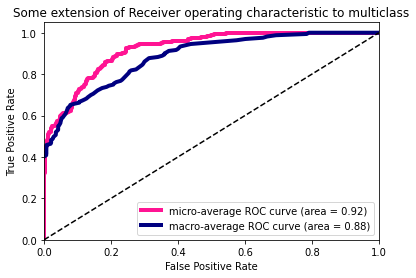

In [ ]:
all_fpr_SVM = np.unique(np.concatenate([fpr_SVM[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr_SVM = np.zeros_like(all_fpr_SVM)
for i in range(n_classes):
    mean_tpr_SVM += np.interp(all_fpr_SVM, fpr_SVM[i], tpr_SVM[i])

# Finally average it and compute AUC
mean_tpr_SVM /= n_classes

fpr_SVM["macro"] = all_fpr_SVM
tpr_SVM["macro"] = mean_tpr_SVM
roc_auc_SVM["macro"] = auc(fpr_SVM["macro"], tpr_SVM["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(
    fpr_SVM["micro"],
    tpr_SVM["micro"],
    label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc_SVM["micro"]),
    color="deeppink",
    linestyle="-",
    linewidth=4,
)

plt.plot(
    fpr_SVM["macro"],
    tpr_SVM["macro"],
    label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc_SVM["macro"]),
    color="navy",
    linestyle="-",
    linewidth=4,
)

plt.plot([0, 1], [0, 1], "k--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Some extension of Receiver operating characteristic to multiclass")
plt.legend(loc="lower right")
plt.show()

**Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier_DT = OneVsRestClassifier(DecisionTreeClassifier(max_depth=6, random_state=1))
y_score_DT = classifier_DT.fit(X_train, y_train).predict_proba(X_test)

In [ ]:
y_score_DT

array([[1.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 1.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.79166667, 0.        ],
       [0.        , 0.        , 0.        , 0.        , 1.        ],
       [0.        , 0.        , 0.        , 0.        , 1.        ],
       [0.        , 1.        , 0.        , 0.        , 0.        ],
       [0.        , 1.        , 0.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.3902439 , 0.        , 0.        ],
       [1.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.79166667, 0.        ],
       [0.        , 0.        , 0.        , 0.        , 1.        ],
       [0.        , 0.61      , 0.60169492, 0.        , 0.        ],
       [0.        , 1.        , 0.        , 0.        , 0.        ],
       [1.        , 0.        , 0.

In [ ]:
n_classes

5

In [ ]:
fpr_DT = dict()
tpr_DT = dict()
roc_auc_DT = dict()
for i in range(n_classes):
    fpr_DT[i], tpr_DT[i], threshold = roc_curve(y_test[:, i], y_score_DT[:, i])
    roc_auc_DT[i] = auc(fpr_DT[i], tpr_DT[i])

# Compute micro-average ROC curve and ROC area
fpr_DT["micro"], tpr_DT["micro"], _ = roc_curve(y_test.ravel(), y_score_DT.ravel())
roc_auc_DT["micro"] = auc(fpr_DT["micro"], tpr_DT["micro"])

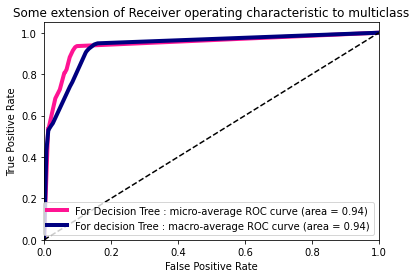

In [ ]:
all_fpr_DT = np.unique(np.concatenate([fpr_DT[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr_DT = np.zeros_like(all_fpr_DT)
for i in range(n_classes):
    mean_tpr_DT += np.interp(all_fpr_DT, fpr_DT[i], tpr_DT[i])

# Finally average it and compute AUC
mean_tpr_DT /= n_classes

fpr_DT["macro"] = all_fpr_DT
tpr_DT["macro"] = mean_tpr_DT
roc_auc_DT["macro"] = auc(fpr_DT["macro"], tpr_DT["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(
    fpr_DT["micro"],
    tpr_DT["micro"],
    label="For Decision Tree : micro-average ROC curve (area = {0:0.2f})".format(roc_auc_DT["micro"]),
    color="deeppink",
    linestyle="-",
    linewidth=4,
)

plt.plot(
    fpr_DT["macro"],
    tpr_DT["macro"],
    label="For decision Tree : macro-average ROC curve (area = {0:0.2f})".format(roc_auc_DT["macro"]),
    color="navy",
    linestyle="-",
    linewidth=4,
)

plt.plot([0, 1], [0, 1], "k--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Some extension of Receiver operating characteristic to multiclass")
plt.legend(loc="lower right")
plt.show()

**Naive Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier_NB = OneVsRestClassifier(GaussianNB())
y_score_NB = classifier_NB.fit(X_train, y_train).predict_proba(X_test)

In [ ]:
fpr_NB = dict()
tpr_NB = dict()
roc_auc_NB = dict()
for i in range(n_classes):
    fpr_NB[i], tpr_NB[i], threshold = roc_curve(y_test[:, i], y_score_NB[:, i])
    roc_auc_NB[i] = auc(fpr_NB[i], tpr_NB[i])

# Compute micro-average ROC curve and ROC area
fpr_NB["micro"], tpr_NB["micro"], _ = roc_curve(y_test.ravel(), y_score_NB.ravel())
roc_auc_NB["micro"] = auc(fpr_NB["micro"], tpr_NB["micro"])

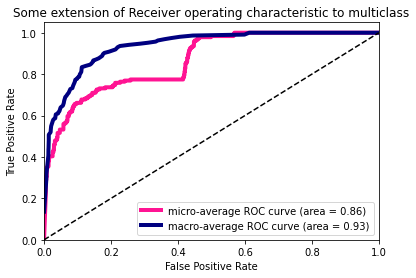

In [ ]:
all_fpr_NB = np.unique(np.concatenate([fpr_NB[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr_NB = np.zeros_like(all_fpr_NB)
for i in range(n_classes):
    mean_tpr_NB += np.interp(all_fpr_NB, fpr_NB[i], tpr_NB[i])

# Finally average it and compute AUC
mean_tpr_NB /= n_classes

fpr_NB["macro"] = all_fpr_NB
tpr_NB["macro"] = mean_tpr_NB
roc_auc_NB["macro"] = auc(fpr_NB["macro"], tpr_NB["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(
    fpr_NB["micro"],
    tpr_NB["micro"],
    label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc_NB["micro"]),
    color="deeppink",
    linestyle="-",
    linewidth=4,
)

plt.plot(
    fpr_NB["macro"],
    tpr_NB["macro"],
    label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc_NB["macro"]),
    color="navy",
    linestyle="-",
    linewidth=4,
)

plt.plot([0, 1], [0, 1], "k--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Some extension of Receiver operating characteristic to multiclass")
plt.legend(loc="lower right")
plt.show()

**KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier_KNN = OneVsRestClassifier(KNeighborsClassifier(n_neighbors=5))
y_score_KNN = classifier_KNN.fit(X_train, y_train).predict_proba(X_test)

In [ ]:
fpr_KNN = dict()
tpr_KNN = dict()
roc_auc_KNN = dict()
for i in range(n_classes):
    fpr_KNN[i], tpr_KNN[i], threshold = roc_curve(y_test[:, i], y_score_KNN[:, i])
    roc_auc_KNN[i] = auc(fpr_KNN[i], tpr_KNN[i])

# Compute micro-average ROC curve and ROC area
fpr_KNN["micro"], tpr_KNN["micro"], _ = roc_curve(y_test.ravel(), y_score_KNN.ravel())
roc_auc_KNN["micro"] = auc(fpr_KNN["micro"], tpr_KNN["micro"])

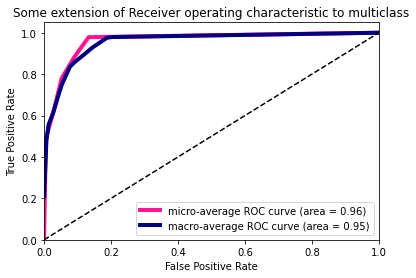

In [ ]:
all_fpr_KNN = np.unique(np.concatenate([fpr_KNN[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr_KNN = np.zeros_like(all_fpr_KNN)
for i in range(n_classes):
    mean_tpr_KNN += np.interp(all_fpr_KNN, fpr_KNN[i], tpr_KNN[i])

# Finally average it and compute AUC
mean_tpr_KNN /= n_classes

fpr_KNN["macro"] = all_fpr_KNN
tpr_KNN["macro"] = mean_tpr_KNN
roc_auc_KNN["macro"] = auc(fpr_KNN["macro"], tpr_KNN["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(
    fpr_KNN["micro"],
    tpr_KNN["micro"],
    label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc_KNN["micro"]),
    color="deeppink",
    linestyle="-",
    linewidth=4,
)

plt.plot(
    fpr_KNN["macro"],
    tpr_KNN["macro"],
    label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc_KNN["macro"]),
    color="navy",
    linestyle="-",
    linewidth=4,
)

plt.plot([0, 1], [0, 1], "k--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Some extension of Receiver operating characteristic to multiclass")
plt.legend(loc="lower right")
plt.show()

**Artificial Neural Network**

In [ ]:
from sklearn.neural_network import MLPClassifier
classifier_ANN = OneVsRestClassifier(MLPClassifier(hidden_layer_sizes=(9),activation="relu",max_iter=1000))
y_score_ANN = classifier_ANN.fit(X_train, y_train).predict_proba(X_test)

In [ ]:
fpr_ANN = dict()
tpr_ANN = dict()
roc_auc_ANN = dict()
for i in range(n_classes):
    fpr_ANN[i], tpr_ANN[i], threshold = roc_curve(y_test[:, i], y_score_ANN[:, i])
    roc_auc_ANN[i] = auc(fpr_ANN[i], tpr_ANN[i])

# Compute micro-average ROC curve and ROC area
fpr_ANN["micro"], tpr_ANN["micro"], _ = roc_curve(y_test.ravel(), y_score_ANN.ravel())
roc_auc_ANN["micro"] = auc(fpr_ANN["micro"], tpr_ANN["micro"])

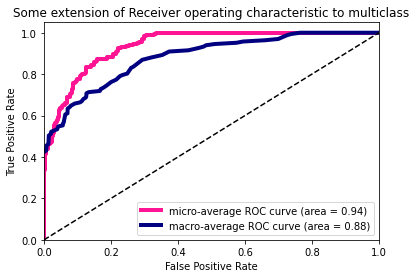

In [ ]:
all_fpr_ANN = np.unique(np.concatenate([fpr_ANN[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr_ANN = np.zeros_like(all_fpr_ANN)
for i in range(n_classes):
    mean_tpr_ANN += np.interp(all_fpr_ANN, fpr_ANN[i], tpr_ANN[i])

# Finally average it and compute AUC
mean_tpr_ANN /= n_classes

fpr_ANN["macro"] = all_fpr_ANN
tpr_ANN["macro"] = mean_tpr_ANN
roc_auc_ANN["macro"] = auc(fpr_ANN["macro"], tpr_ANN["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(
    fpr_ANN["micro"],
    tpr_ANN["micro"],
    label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc_ANN["micro"]),
    color="deeppink",
    linestyle="-",
    linewidth=4,
)

plt.plot(
    fpr_ANN["macro"],
    tpr_ANN["macro"],
    label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc_ANN["macro"]),
    color="navy",
    linestyle="-",
    linewidth=4,
)

plt.plot([0, 1], [0, 1], "k--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Some extension of Receiver operating characteristic to multiclass")
plt.legend(loc="lower right")
plt.show()

**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier_RF = OneVsRestClassifier(RandomForestClassifier(n_estimators=100))
y_score_RF = classifier_RF.fit(X_train, y_train).predict_proba(X_test)

In [ ]:
fpr_RF = dict()
tpr_RF = dict()
roc_auc_RF = dict()
for i in range(n_classes):
    fpr_RF[i], tpr_RF[i], threshold = roc_curve(y_test[:, i], y_score_RF[:, i])
    roc_auc_RF[i] = auc(fpr_RF[i], tpr_RF[i])

# Compute micro-average ROC curve and ROC area
fpr_RF["micro"], tpr_RF["micro"], _ = roc_curve(y_test.ravel(), y_score_RF.ravel())
roc_auc_RF["micro"] = auc(fpr_RF["micro"], tpr_RF["micro"])

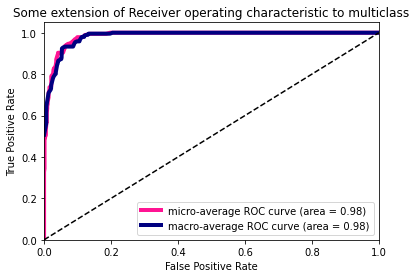

In [ ]:
all_fpr_RF = np.unique(np.concatenate([fpr_RF[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr_RF = np.zeros_like(all_fpr_RF)
for i in range(n_classes):
    mean_tpr_RF += np.interp(all_fpr_RF, fpr_RF[i], tpr_RF[i])

# Finally average it and compute AUC
mean_tpr_RF /= n_classes

fpr_RF["macro"] = all_fpr_RF
tpr_RF["macro"] = mean_tpr_RF
roc_auc_RF["macro"] = auc(fpr_RF["macro"], tpr_RF["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(
    fpr_RF["micro"],
    tpr_RF["micro"],
    label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc_RF["micro"]),
    color="deeppink",
    linestyle="-",
    linewidth=4,
)

plt.plot(
    fpr_RF["macro"],
    tpr_RF["macro"],
    label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc_RF["macro"]),
    color="navy",
    linestyle="-",
    linewidth=4,
)

plt.plot([0, 1], [0, 1], "k--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Some extension of Receiver operating characteristic to multiclass")
plt.legend(loc="lower right")
plt.show()

**Gradient Boost**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
import joblib
from  sklearn.utils import parallel_backend 
classifier_GB = OneVsRestClassifier(GradientBoostingClassifier(learning_rate=.1, n_estimators=500,max_depth=5 ))
y_score_GB = classifier_GB.fit(X_train, y_train).predict_proba(X_test)

In [ ]:
fpr_GB = dict()
tpr_GB = dict()
roc_auc_GB = dict()
for i in range(n_classes):
    fpr_GB[i], tpr_GB[i], threshold = roc_curve(y_test[:, i], y_score_GB[:, i])
    roc_auc_GB[i] = auc(fpr_GB[i], tpr_GB[i])

# Compute micro-average ROC curve and ROC area
fpr_GB["micro"], tpr_GB["micro"], _ = roc_curve(y_test.ravel(), y_score_GB.ravel())
roc_auc_GB["micro"] = auc(fpr_GB["micro"], tpr_GB["micro"])

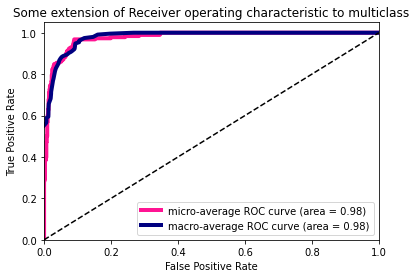

In [ ]:
all_fpr_GB = np.unique(np.concatenate([fpr_GB[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr_GB = np.zeros_like(all_fpr_GB)
for i in range(n_classes):
    mean_tpr_GB += np.interp(all_fpr_GB, fpr_GB[i], tpr_GB[i])

# Finally average it and compute AUC
mean_tpr_GB /= n_classes

fpr_GB["macro"] = all_fpr_GB
tpr_GB["macro"] = mean_tpr_GB
roc_auc_GB["macro"] = auc(fpr_GB["macro"], tpr_GB["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(
    fpr_GB["micro"],
    tpr_GB["micro"],
    label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc_GB["micro"]),
    color="deeppink",
    linestyle="-",
    linewidth=4,
)

plt.plot(
    fpr_GB["macro"],
    tpr_GB["macro"],
    label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc_GB["macro"]),
    color="navy",
    linestyle="-",
    linewidth=4,
)

plt.plot([0, 1], [0, 1], "k--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Some extension of Receiver operating characteristic to multiclass")
plt.legend(loc="lower right")
plt.show()

**Xtreme Gradiant Boost**

In [ ]:
import xgboost as xgb
classifier_xgb = OneVsRestClassifier(xgb.XGBClassifier(max_depth=10, n_estimators=5000 , learning_rate=.5, n_jobs=-1))
y_score_xgb = classifier_xgb.fit(X_train, y_train).predict_proba(X_test)

In [ ]:
fpr_xgb = dict()
tpr_xgb = dict()
roc_auc_xgb = dict()
for i in range(n_classes):
    fpr_xgb[i], tpr_xgb[i], threshold = roc_curve(y_test[:, i], y_score_xgb[:, i])
    roc_auc_xgb[i] = auc(fpr_xgb[i], tpr_xgb[i])

# Compute micro-average ROC curve and ROC area
fpr_xgb["micro"], tpr_xgb["micro"], _ = roc_curve(y_test.ravel(), y_score_xgb.ravel())
roc_auc_xgb["micro"] = auc(fpr_xgb["micro"], tpr_xgb["micro"])

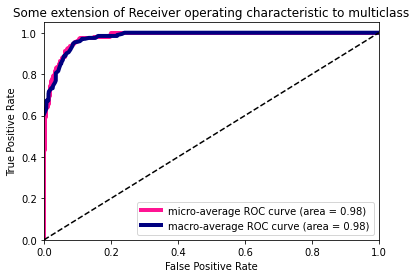

In [ ]:
all_fpr_xgb = np.unique(np.concatenate([fpr_xgb[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr_xgb = np.zeros_like(all_fpr_xgb)
for i in range(n_classes):
    mean_tpr_xgb += np.interp(all_fpr_xgb, fpr_xgb[i], tpr_xgb[i])

# Finally average it and compute AUC
mean_tpr_xgb /= n_classes

fpr_xgb["macro"] = all_fpr_xgb
tpr_xgb["macro"] = mean_tpr_xgb
roc_auc_xgb["macro"] = auc(fpr_xgb["macro"], tpr_xgb["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(
    fpr_xgb["micro"],
    tpr_xgb["micro"],
    label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc_xgb["micro"]),
    color="deeppink",
    linestyle="-",
    linewidth=4,
)

plt.plot(
    fpr_xgb["macro"],
    tpr_xgb["macro"],
    label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc_xgb["macro"]),
    color="navy",
    linestyle="-",
    linewidth=4,
)

plt.plot([0, 1], [0, 1], "k--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Some extension of Receiver operating characteristic to multiclass")
plt.legend(loc="lower right")
plt.show()

**Stacking Random Forest**

In [ ]:
from sklearn.neural_network import MLPClassifier
nnc = MLPClassifier(hidden_layer_sizes=(9),activation="relu",max_iter=1000)
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
randomf = RandomForestClassifier(n_jobs=-1)
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
from sklearn.model_selection import GridSearchCV
estimators = [('rf', randomf),('neural', nnc),
        ('knn',knn)
        ]
from sklearn.ensemble import StackingClassifier
final_estimator = {'final_estimator':[randomf,knn,nnc,None]}
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
newgsearchrandom =  StackingClassifier(estimators=estimators, n_jobs=-1,final_estimator=randomf)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier_SRF = OneVsRestClassifier(StackingClassifier(estimators=estimators, n_jobs=-1,final_estimator=randomf))
y_score_SRF = classifier_SRF.fit(X_train, y_train).predict_proba(X_test)

In [ ]:
fpr_SRF = dict()
tpr_SRF = dict()
roc_auc_SRF = dict()
for i in range(n_classes):
    fpr_SRF[i], tpr_SRF[i], threshold = roc_curve(y_test[:, i], y_score_SRF[:, i])
    roc_auc_SRF[i] = auc(fpr_SRF[i], tpr_SRF[i])

# Compute micro-average ROC curve and ROC area
fpr_SRF["micro"], tpr_SRF["micro"], _ = roc_curve(y_test.ravel(), y_score_SRF.ravel())
roc_auc_SRF["micro"] = auc(fpr_SRF["micro"], tpr_SRF["micro"])

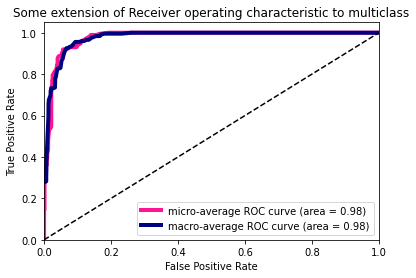

In [ ]:
all_fpr_SRF = np.unique(np.concatenate([fpr_SRF[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr_SRF = np.zeros_like(all_fpr_SRF)
for i in range(n_classes):
    mean_tpr_SRF += np.interp(all_fpr_SRF, fpr_SRF[i], tpr_SRF[i])

# Finally average it and compute AUC
mean_tpr_SRF /= n_classes

fpr_SRF["macro"] = all_fpr_SRF
tpr_SRF["macro"] = mean_tpr_SRF
roc_auc_SRF["macro"] = auc(fpr_SRF["macro"], tpr_SRF["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(
    fpr_SRF["micro"],
    tpr_SRF["micro"],
    label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc_SRF["micro"]),
    color="deeppink",
    linestyle="-",
    linewidth=4,
)

plt.plot(
    fpr_SRF["macro"],
    tpr_SRF["macro"],
    label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc_SRF["macro"]),
    color="navy",
    linestyle="-",
    linewidth=4,
)

plt.plot([0, 1], [0, 1], "k--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Some extension of Receiver operating characteristic to multiclass")
plt.legend(loc="lower right")
plt.show()

**Stacking Neural Network**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier_SNN = OneVsRestClassifier(StackingClassifier(estimators=estimators, n_jobs=-1,final_estimator=nnc))
y_score_SNN = classifier_SNN.fit(X_train, y_train).predict_proba(X_test)

In [ ]:
fpr_SNN = dict()
tpr_SNN = dict()
roc_auc_SNN = dict()
for i in range(n_classes):
    fpr_SNN[i], tpr_SNN[i], threshold = roc_curve(y_test[:, i], y_score_SNN[:, i])
    roc_auc_SNN[i] = auc(fpr_SNN[i], tpr_SNN[i])

# Compute micro-average ROC curve and ROC area
fpr_SNN["micro"], tpr_SNN["micro"], _ = roc_curve(y_test.ravel(), y_score_SNN.ravel())
roc_auc_SNN["micro"] = auc(fpr_SNN["micro"], tpr_SNN["micro"])

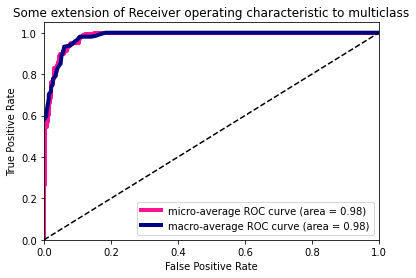

In [ ]:
all_fpr_SNN = np.unique(np.concatenate([fpr_SNN[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr_SNN = np.zeros_like(all_fpr_SNN)
for i in range(n_classes):
    mean_tpr_SNN += np.interp(all_fpr_SNN, fpr_SNN[i], tpr_SNN[i])

# Finally average it and compute AUC
mean_tpr_SNN /= n_classes

fpr_SNN["macro"] = all_fpr_SNN
tpr_SNN["macro"] = mean_tpr_SNN
roc_auc_SNN["macro"] = auc(fpr_SNN["macro"], tpr_SNN["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(
    fpr_SNN["micro"],
    tpr_SNN["micro"],
    label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc_SNN["micro"]),
    color="deeppink",
    linestyle="-",
    linewidth=4,
)

plt.plot(
    fpr_SNN["macro"],
    tpr_SNN["macro"],
    label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc_SNN["macro"]),
    color="navy",
    linestyle="-",
    linewidth=4,
)

plt.plot([0, 1], [0, 1], "k--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Some extension of Receiver operating characteristic to multiclass")
plt.legend(loc="lower right")
plt.show()

**Micro All ROC**

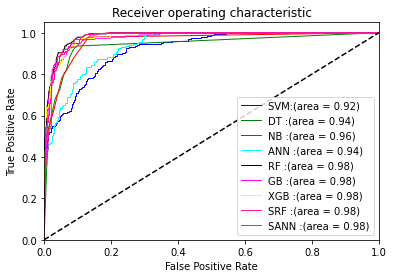

In [ ]:
#SVM
plt.figure()
plt.plot(
    fpr_SVM["micro"],
    tpr_SVM["micro"],
    label="SVM:(area = {0:0.2f})".format(roc_auc_SVM["micro"]),
    color="blue",
    linestyle="-",
    linewidth=1,
)

#DT
plt.plot(
    fpr_DT["micro"],
    tpr_DT["micro"],
    label="DT :(area = {0:0.2f})".format(roc_auc_DT["micro"]),
    color="green",
    linestyle="-",
    linewidth=1,
)

#NB
plt.plot(
    fpr_KNN["micro"],
    tpr_KNN["micro"],
    label="NB :(area = {0:0.2f})".format(roc_auc_KNN["micro"]),
    color="red",
    linestyle="-",
    linewidth=1,
)

#ANN
plt.plot(
    fpr_ANN["micro"],
    tpr_ANN["micro"],
    label="ANN :(area = {0:0.2f})".format(roc_auc_ANN["micro"]),
    color="cyan",
    linestyle="-",
    linewidth=1,
)

#RF
plt.plot(
    fpr_RF["micro"],
    tpr_RF["micro"],
    label="RF :(area = {0:0.2f})".format(roc_auc_RF["micro"]),
    color="black",
    linestyle="-",
    linewidth=1,
)

#GB
plt.plot(
    fpr_GB["micro"],
    tpr_GB["micro"],
    label="GB :(area = {0:0.2f})".format(roc_auc_GB["micro"]),
    color="magenta",
    linestyle="-",
    linewidth=1,
)

#XGB
plt.plot(
    fpr_xgb["micro"],
    tpr_xgb["micro"],
    label="XGB :(area = {0:0.2f})".format(roc_auc_xgb["micro"]),
    color="yellow",
    linestyle="-",
    linewidth=1,
)

#SRF
plt.plot(
    fpr_SRF["micro"],
    tpr_SRF["micro"],
    label="SRF :(area = {0:0.2f})".format(roc_auc_SRF["micro"]),
    color="deeppink",
    linestyle="-",
    linewidth=1,
)

#SANN
plt.plot(
    fpr_SNN["micro"],
    tpr_SNN["micro"],
    label="SANN :(area = {0:0.2f})".format(roc_auc_SNN["micro"]),
    color="deeppink",
    linestyle="-",
    linewidth=1,
)
plt.plot([0, 1], [0, 1], "k--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()